# Support Vector Machines

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import svm
import matplotlib.pyplot as plt

In [6]:
data= load_iris()
X = data.data
y = data.target
m, n = X.shape

col = data['feature_names']
names = data['target_names']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

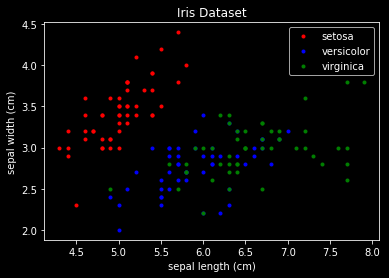

In [4]:

plt.figure()
plt.plot(X[y==0, 0], X[y==0, 1], 'r.', label=names[0])
plt.plot(X[y==1, 0], X[y==1, 1], 'b.', label=names[1])
plt.plot(X[y==2, 0], X[y==2, 1], 'g.', label=names[2])
plt.xlabel(col[0])
plt.ylabel(col[1])
plt.title('Iris Dataset')
plt.legend()
plt.show()

In [4]:
clf = svm.SVC(C = 10, kernel='linear')
clf.fit(X[:, :2], y)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [5]:
pre = clf.predict(X[:, :2])
acc = pre[pre==y].size/pre.size*100
print(acc)

82.0


# Plotting Decision Boundary

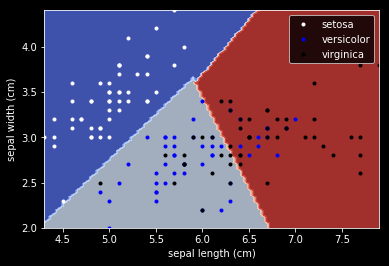

In [6]:
xx = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
yy = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx, yy = np.meshgrid(xx, yy)

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)
ax.plot(X[y==0, 0], X[y==0, 1], 'w.', label=names[0])
ax.plot(X[y==1, 0], X[y==1, 1], 'b.', label=names[1])
ax.plot(X[y==2, 0], X[y==2, 1], 'k.', label=names[2])
ax.set_xlabel(col[0])
ax.set_ylabel(col[1])
ax.legend()
plt.show()


# Using PCA to reduce the features

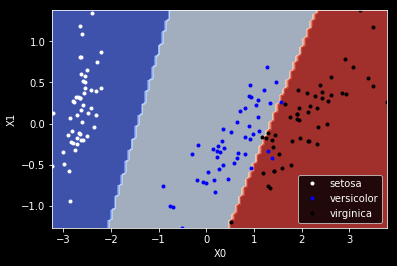

In [7]:
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)

model = svm.SVC(kernel='linear')
clf2 = model.fit(Xreduced, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]

xx = np.linspace(X0.min(), X0.max(), 100)
yy = np.linspace(X1.min(), X1.max(), 100)
xx, yy = np.meshgrid(xx, yy)

z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(Xreduced[y==0, 0], Xreduced[y==0, 1], 'w.', label=names[0])
plt.plot(Xreduced[y==1, 0], Xreduced[y==1, 1], 'b.', label=names[1])
plt.plot(Xreduced[y==2, 0], Xreduced[y==2, 1], 'k.', label=names[2])
plt.xlabel('X0')
plt.ylabel('X1')
plt.legend()
plt.show()